This homework is based on the data about cardiac Single Proton Emission Computed Tomography. This data was obtained from https://archive.ics.uci.edu/ml/datasets/spect+heart. Your goal is to predict the diagnosis of the patient. There are no missing variables.

1. Import and merge the SPECT.train and SPECT.test data sets (e.g., use read_csv() to import the data and concat() to merge the data). Create a single dataframe with appropriate column names (see link above) where the 'OVERALL_DIAGNOSIS' column is the outcome variable. Print the top 10 records of your dataframe.

2.  Partition the data into training (60%) and validation (40%) sets

3. Run the Naïve Bayes algorithm, print your classification summary, and plot the related gains and lift charts.

4. Run a decision tree classifier algorithm on the data and print your tree.  Re-run your analysis with a smaller tree where max_depth=30, min_samples_split=20, and min_impurity_decrease=0.01. Print the summaries of your classification.

5. Re-rerun your analysis using random forests and boosted tree algorithms. Print your classification summary and feature importance scores.

6. Run logistic regression on the data, print your classification summary, and plot the related gains and lift charts. 

7. Discuss your results. How do your results compare to the results from the CLIP3 algorithm mentioned in the link above? Discuss ways to improve your predictive accuracy. What are the advantages and disadvantages of each of the algorithms that you employed?

In [1]:
# import numpy as np
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from dmba import plotDecisionTree, classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score 

In [3]:
# 1.
# Import and merge the SPECT.train and SPECT.test data sets (e.g., use read_csv() to import the data and concat() to merge the data).
# Create a single dataframe with appropriate column names (see link above) where the 'OVERALL_DIAGNOSIS' column is the outcome variable.
# Print the top 10 records of your dataframe.

spect_test = pd.read_csv('SPECT.test',header=None)
spect_train = pd.read_csv('SPECT.train',header=None)
spect_frames = [spect_test, spect_train]
spect = pd.concat(spect_frames)

column_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
new_names = ['OVERALL_DIAGNOSIS','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19','F20','F21','F22']
old_names = spect.columns[column_indices]
spect.rename(columns=dict(zip(old_names, new_names)), inplace=True)

spect.head(10)


,OVERALL_DIAGNOSIS,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,1,1,0,0,1,1,0,0,0,1,...,0,1,1,1,0,0,1,1,0,0
1,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,1,0,1,1,1,0,0,1,0,1,...,1,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1
5,1,0,0,1,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,1
6,1,1,0,0,1,0,0,1,1,1,...,1,1,0,1,0,0,0,1,0,1
7,1,1,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9,1,1,0,0,1,1,1,0,0,1,...,0,1,0,1,1,0,1,0,0,0


In [4]:
# 2.
# Partition the data into training (60%) and validation (40%) sets

# create a list of predictor variables by remvoing output variables and text columns
excludeColumns = ('OVERALL_DIAGNOSIS')
predictors = [s for s in spect.columns if s not in excludeColumns]
outcome = 'OVERALL_DIAGNOSIS'

# partition data
X = spect[predictors]
y = spect[outcome]

classes = ['normal','abnormal']

# training (60%) and validation (40%)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [5]:
# 3. 
# Run the Naïve Bayes algorithm, print your classification summary, and plot the related gains and lift charts.

# run naive Bayes
spect_nb = MultinomialNB(alpha=0.01)
spect_nb.fit(train_X, train_y)
# predict probabilities
predProb_train = spect_nb.predict_proba(train_X)
predProb_valid = spect_nb.predict_proba(valid_X)

# training
# predict class membership
y_train_pred = spect_nb.predict(train_X)
classificationSummary(train_y, y_train_pred, class_names=classes)
print("\n\n")
# validation
y_valid_pred = spect_nb.predict(valid_X)
classificationSummary(valid_y, y_valid_pred, class_names=classes) 


Confusion Matrix (Accuracy 0.8125)

         Prediction
  Actual   normal abnormal
  normal        1       30
abnormal        0      129



Confusion Matrix (Accuracy 0.7757)

         Prediction
  Actual   normal abnormal
  normal        0       24
abnormal        0       83


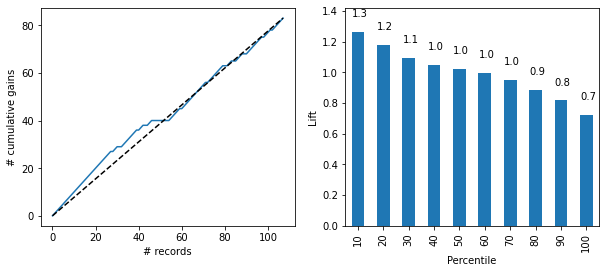

In [6]:
# Plot the related gains and lift charts. 

spect_nb_pred = spect_nb.predict(valid_X)
spect_nb_proba = spect_nb.predict_proba(valid_X)
spect_nb_result = pd.DataFrame({'actual': valid_y, 'p(0)': [p[0] for p in spect_nb_proba],'p(1)': [p[1] for p in spect_nb_proba],'predicted': spect_nb_pred })

df = spect_nb_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [7]:
# 4.
# Run a decision tree classifier algorithm on the data and print your tree. 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from dmba import classificationSummary 

# single tree
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train_X, train_y)
classes = clf.classes_
classificationSummary(valid_y, clf.predict(valid_X), class_names=classes)

print()
print()

plotDecisionTree(clf, feature_names=train_X.columns)

#text_representation = tree.export_text(clf)
#print(text_representation)

Confusion Matrix (Accuracy 0.8411)

       Prediction
Actual  0  1
     0 14 10
     1  7 76




InvocationException: GraphViz's executables not found

In [7]:
# Re-run your analysis with a smaller tree where max_depth=30, min_samples_split=20, and min_impurity_decrease=0.01.
# Print the summaries of your classification.

# single tree
clfRerun = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01, random_state=1)
clfRerun.fit(train_X, train_y)
classes = clfRerun.classes_
classificationSummary(valid_y, clfRerun.predict(valid_X), class_names=classes)

print()
print()

text_representation = tree.export_text(clf)
print(text_representation)


Confusion Matrix (Accuracy 0.7757)

       Prediction
Actual  0  1
     0  0 24
     1  0 83


|--- feature_12 <= 0.50
|   |--- feature_15 <= 0.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_16 <= 0.50
|   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |--- feature_21 <= 0.50
|   |   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   

With the changed parameters, the accuracy is reduced, from .84 to .78.

   feature  importance       std
14     F15    0.015437  0.020554
17     F18    0.016888  0.023686
13     F14    0.025242  0.024071
5       F6    0.026512  0.027107
1       F2    0.030959  0.035738
10     F11    0.031769  0.037966
18     F19    0.032505  0.029225
8       F9    0.033034  0.032424
2       F3    0.036577  0.035888
11     F12    0.036829  0.038578
3       F4    0.038591  0.032457
0       F1    0.041152  0.040053
4       F5    0.045557  0.047774
6       F7    0.047205  0.051153
15     F16    0.048116  0.041363
20     F21    0.050660  0.047352
16     F17    0.050804  0.033114
9      F10    0.069010  0.049726
19     F20    0.072626  0.044307
21     F22    0.076522  0.044740
7       F8    0.078669  0.049413
12     F13    0.095336  0.059553


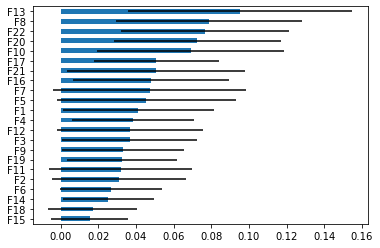

Confusion Matrix (Accuracy 0.8505)

       Prediction
Actual  0  1
     0 13 11
     1  5 78


In [8]:
# Re-rerun your analysis using random forests and boosted tree algorithms. Print your classification summary and feature importance scores.

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(train_X, train_y)

# variable (feature) importance plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()

# confusion matrix for validation set
classificationSummary(valid_y, rf.predict(valid_X))

/Users/cgagnon/anaconda3/envs/HI530/lib/python3.8/site-packages/sklearn/tree/_classes.py:600: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


   feature    importance           std
21     F22 -3.751399e-01  2.244396e+00
3       F4 -2.867657e-02  3.068348e-01
17     F18  3.180623e-66  3.164680e-65
13     F14  7.352943e-05  7.316086e-04
6       F7  4.901961e-04  4.877390e-03
10     F11  9.597970e-04  8.841180e-03
16     F17  1.259672e-03  8.829256e-03
18     F19  1.566658e-03  1.020406e-02
0       F1  2.508775e-03  1.811010e-02
15     F16  2.566435e-03  1.473192e-02
4       F5  3.824725e-03  2.389215e-02
9      F10  4.124346e-03  2.595871e-02
1       F2  9.985176e-03  9.544652e-02
7       F8  1.061002e-02  6.940123e-02
20     F21  1.369603e-02  1.343173e-01
19     F20  2.021562e-02  8.177682e-01
2       F3  2.278906e-02  2.068519e-01
8       F9  4.369104e-02  2.615132e-01
14     F15  1.275116e-01  1.052145e+00
5       F6           NaN           NaN
11     F12           NaN           NaN
12     F13           NaN           NaN


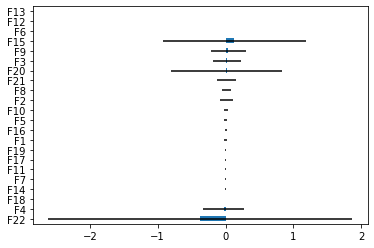

Confusion Matrix (Accuracy 0.8411)

       Prediction
Actual  0  1
     0 15  9
     1  8 75


In [9]:
# Boosting

boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
boost.fit(train_X, train_y)

# variable (feature) importance plot
importances = boost.feature_importances_
std = np.std([tree.feature_importances_ for tree in boost.estimators_], axis=0)
df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()

# confusion matrix for validation set
classificationSummary(valid_y, boost.predict(valid_X), class_names=classes)

In [10]:
# 6.
# Run logistic regression on the data, print your classification summary, and plot the related gains and lift charts. 

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

# confusion matrix for validation set
classificationSummary(valid_y, logit_reg.predict(valid_X), class_names=classes)


intercept  -1.1602456742067286
             F1       F2        F3        F4        F5        F6        F7  \
coeff -2.828296  1.31123 -0.917436  1.723884  1.654959 -0.541409  2.243088   

             F8        F9      F10  ...       F13      F14      F15       F16  \
coeff  1.202728 -0.578587  2.93806  ...  2.018925  1.38206 -1.61907  2.338341   

             F17       F18      F19       F20       F21      F22  
coeff  10.942839  8.234496 -1.13396  1.803012  0.771582  1.37968  

[1 rows x 22 columns]
Confusion Matrix (Accuracy 0.8411)

       Prediction
Actual  0  1
     0 15  9
     1  8 75


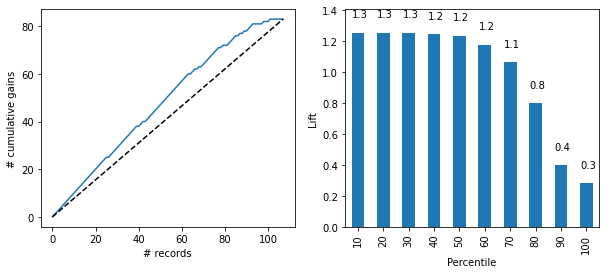

In [11]:
# Plot the related gains and lift charts. 

logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 'p(0)': [p[0] for p in logit_reg_proba],'p(1)': [p[1] for p in logit_reg_proba],'predicted': logit_reg_pred })

df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [12]:
# AIC Scores Comparisons

print('Logistic Regression AIC: ', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1)) 
print('Naive Bayes AIC:', AIC_score(valid_y, spect_nb.predict(valid_X), df = len(train_X.columns) + 1)) 
print('Single Tree AIC:', AIC_score(valid_y, boost.predict(valid_X), df = len(train_X.columns) + 1)) 
print('Random Forest AIC:', AIC_score(valid_y, rf.predict(valid_X), df = len(train_X.columns) + 1)) 
print('Boost AIC:', AIC_score(valid_y, boost.predict(valid_X), df = len(train_X.columns) + 1)) 


Logistic Regression AIC:  154.8139886323911
Naive Bayes AIC: 191.71192066560616
Single Tree AIC: 154.8139886323911
Random Forest AIC: 148.32715409803257
Boost AIC: 154.8139886323911


# 7.

**Q: Discuss your results. How do your results compare to the results from the CLIP3 algorithm mentioned in the link above? Discuss ways to improve your predictive accuracy. What are the advantages and disadvantages of each of the algorithms that you employed?**

In general our results were comparative. Some of the simpler algorithms, like single tree classifier only reached 77-78% accuracy but some of our other models, like random forests and boosted tree algorithms, reached over 84%, comparing with CLIP3. The CLIP3 algorithm generated rules that were 84.0% accurate (as compared with cardilogists' diagnoses).


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52e9ae2e-8d42-48c9-9988-588f5a262306' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>